# 0. Installs, Imports and API Keys

In [ ]:
# RUN THIS CELL FIRST!
!pip install -q langchain==0.0.150 pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.4/648.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.3 MB

In [ ]:
!pip uninstall openai

!pip install -Iv  openai==0.27.8

Found existing installation: openai 1.20.0
Uninstalling openai-1.20.0:
  Would remove:
    /usr/local/bin/openai
    /usr/local/lib/python3.10/dist-packages/openai-1.20.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/openai/*
Proceed (Y/n)? Y
  Successfully uninstalled openai-1.20.0
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-iNkgMzZMjlN8kG4vofwqT3BlbkFJYETCWEtwfBUt8YKYCZpu"

# 1. Loading PDFs and chunking with LangChain

In [ ]:
!pip install PyPDF2
import PyPDF2
from PyPDF2 import PdfReader

In [ ]:
# You MUST add your PDF to local files in this notebook (folder icon on left hand side of screen)

# Simple method - Split by pages
loader = PyPDFLoader("/content/RabindraNath.pdf")
pages = loader.load_and_split()
print(pages[0])

# SKIP TO STEP 2 IF YOU'RE USING THIS METHOD
chunks = pages

NameError: name 'PyPDFLoader' is not defined

In [ ]:
!pip install textract
!pip install pdfminer.six

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (738 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Step 1: Convert PDF to text
import textract
file_path = "/content/harrypotterbook.pdf"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")
# Try using pdftotext first
try:
    doc = textract.process(file_path, method="pdftotext")
except ShellError:
    # If pdftotext fails, try using pdfminer
    doc = textract.process(file_path, method="pdfminer")
#doc = textract.process("/content/harrypotterbook.pdf", method = "pdftotext")

# Step 2: Save to .txt and reopen (helps prevent issues)
with open('attention_is_all_you_need.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('attention_is_all_you_need.txt', 'r') as f:
    text = f.read()

# Step 3: Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Step 4: Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])

In [ ]:
# Result is many LangChain 'Documents' around 500 tokens or less (Recursive splitter sometimes allows more tokens to retain context)
type(chunks[0])

langchain.schema.Document

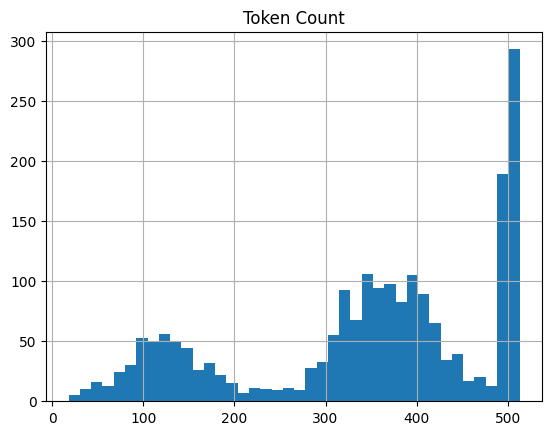

In [ ]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=40, )

# Show the plot
plt.show()

# 2. Embed text and store embeddings

In [ ]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

AuthenticationError: Incorrect API key provided: sk-6ks74***************************************8e5G. You can find your API key at https://platform.openai.com/account/api-keys.

# 3. Setup retrieval function

In [ ]:
# Check similarity search is working
query = "Rabindranath Tagore"
docs = db.similarity_search(query)
docs[0]

AuthenticationError: Incorrect API key provided: sk-6ks74***************************************8e5G. You can find your API key at https://platform.openai.com/account/api-keys.

In [ ]:
# Create QA chain to integrate similarity search with user queries (answer query from knowledge base)

chain = load_qa_chain(OpenAI(model="gpt-3.5-turbo-instruct",temperature=0), chain_type="stuff")

query = "Rabindranath Tagore"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

                    model was transfered to model_kwargs.
                    Please confirm that model is what you intended.


" I'm sorry, I don't understand the question. Can you please clarify?"

# 5. Create chatbot with chat memory (OPTIONAL)

In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(model="gpt-3.5-turbo-instruct",temperature=0.1), db.as_retriever())

                    model was transfered to model_kwargs.
                    Please confirm that model is what you intended.


In [ ]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the Transformers chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

HTML(value='<b>User:</b> W')

HTML(value='<b><font color="blue">Chatbot:</font></b>  I don\'t know.')

HTML(value='<b>User:</b> who is Rabindranath Tagore')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Rabindranath Tagore was a famous Indian poet, writer, a…

HTML(value='<b>User:</b> when was ')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Rabindranath Tagore lived from 1861 to 1941 and was a p…

HTML(value='<b>User:</b> what happen in 1901')

HTML(value='<b><font color="blue">Chatbot:</font></b>  In 1901, Rabindranath Tagore founded the school Santini…

HTML(value='<b>User:</b> Tagore on education')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Rabindranath Tagore was a renowned Indian poet, philoso…